<a href="https://colab.research.google.com/github/parthasarathydNU/gen-ai-coursework/blob/main/advanced-llms/CourseWork/INFO_7374_Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install latexify-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import latexify

Deep learning is largely about function approximation


1. data representation
2. model (parameters/knobs that you can tune)
3. way to measure quantitatively how good the model is (loss)

![artificial neuron](https://www.researchgate.net/publication/351443166/figure/fig2/AS:1021624551743489@1620585682403/A-biological-neuron-in-comparison-to-an-artificial-neural-network-a-Brain-neuron-b.png)


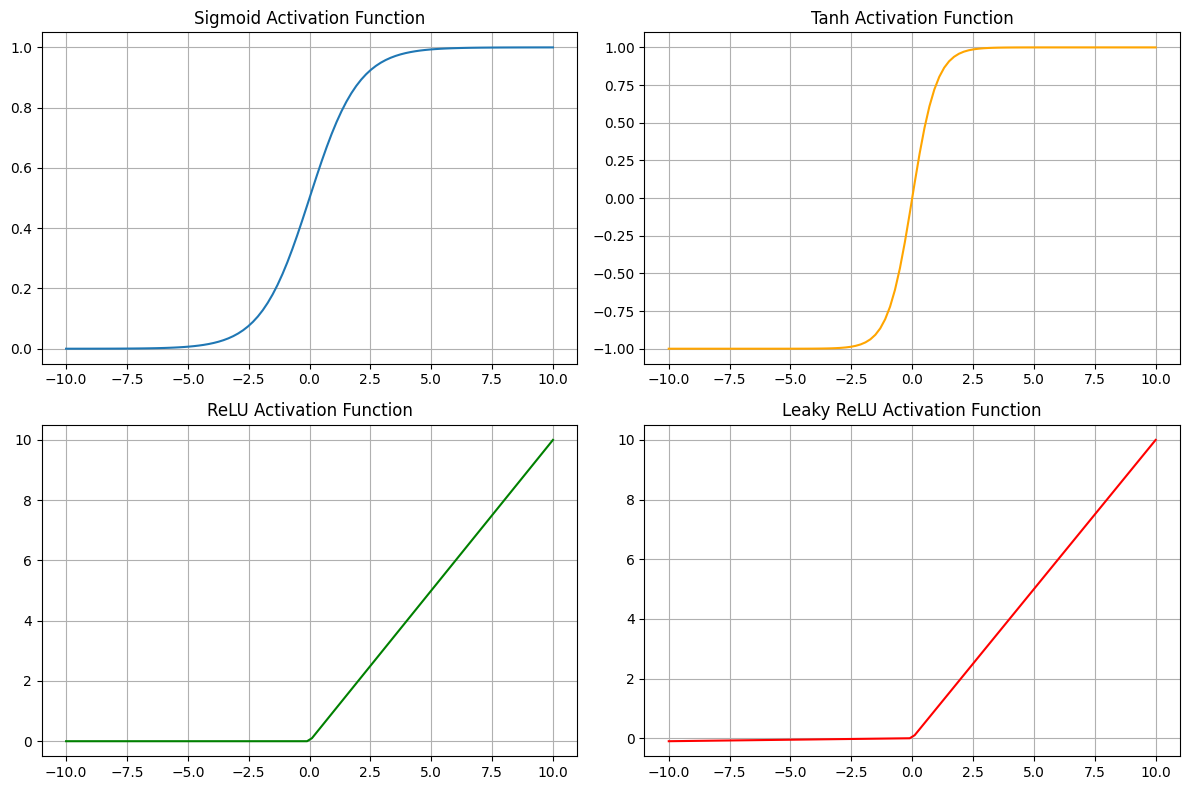

In [ ]:
# Define the range for the x-axis
x = np.linspace(-10, 10, 100)

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh Function
def tanh(x):
    return np.tanh(x)

# ReLU Function
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU Function
def leaky_relu(x):
    return np.where(x > 0, x, x * 0.01)

# Plotting the functions
plt.figure(figsize=(12, 8))

# Sigmoid
plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.title("Sigmoid Activation Function")
plt.grid()

# Tanh
plt.subplot(2, 2, 2)
plt.plot(x, tanh(x), label="Tanh", color='orange')
plt.title("Tanh Activation Function")
plt.grid()

# ReLU
plt.subplot(2, 2, 3)
plt.plot(x, relu(x), label="ReLU", color='green')
plt.title("ReLU Activation Function")
plt.grid()

# Leaky ReLU
plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu(x), label="Leaky ReLU", color='red')
plt.title("Leaky ReLU Activation Function")
plt.grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Single Neuron that predicts 3

## Objective Functions

- An objective function is like a compass that guides the machine learning model towards its goal.
- It is a mathematical function that the model aims to optimize (maximize or minimize) during the learning process.
- The objective function quantifies how well the model is performing on the given task.

Examples of Different Types of Objective Functions:
1. Loss Functions:
   - Used in supervised learning problems.
   - Measures the discrepancy between the model's predictions and the actual target values.
   - Example: Mean Squared Error (MSE) for regression problems.
     - Analogous to measuring the distance between where you are and where you want to be.
     - Formula: MSE = (1/n) * Σ(y_pred - y_actual)^2
   - Example: Cross-entropy Loss for classification problems.
     - Analogous to measuring how well the model's predicted probabilities match the true class labels.
     - Formula: Cross-entropy = -Σ(y_actual * log(y_pred))

2. Likelihood Functions:
   - Used in unsupervised learning problems, particularly in probabilistic models.
   - Measures how likely the observed data is under the model's probability distribution.
   - The goal is to find the model parameters that maximize the likelihood of the observed data.



Text(0, 0.5, 'losses')

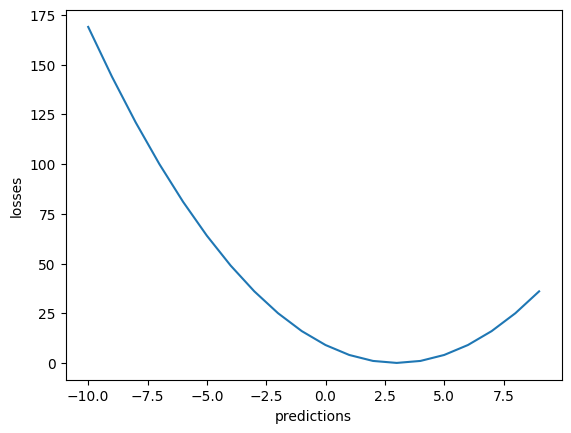

In [ ]:
# visualization of MSE loss wrt different predictions
# as we get further from the ground truth, the loss gets bigger


# (gt - pred ) ** 2 instead of |gt - pred|

# gt = 3
# pred = 1

# MSE: (3 - 1) ** 2 = 4
# Non MSE: 3 - 1 = 2

# gt = 3
# pred = 5

# Non MSE: 3 - 5 =

# ground truth is 3
ground_truth = 3
predictions = np.arange(-10, 10)
losses = (predictions - ground_truth) ** 2

plt.plot(predictions, losses)
plt.xlabel('predictions')
plt.ylabel('losses')

In [ ]:
# linear regression model
x = 5 # data

w = 6 # model parameters
b = 7

prediction = w*x + b
ground_truth = 3

loss = (prediction - ground_truth) ** 2


print(f"{prediction=} {loss=}")


prediction=37 loss=1156


## Gradient Descent

By definition, the a gradient is defined as the list/vector of partial derivatives.


We ignore the data and target values since we cannot tune these values.

$\nabla loss(w, b) = ⟨ \frac{\delta loss}{\delta w} , \frac{\delta loss}{\delta b} \rangle$

![gradient descent](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/03/06100746/grad.png)


<!-- Let's first review the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) -->



In [ ]:
@latexify.expression
def compute_loss(prediction, ground_truth):
    return (prediction - ground_truth) ** 2

compute_loss

In [ ]:
@latexify.expression
def compute_loss(w, x, b, ground_truth):
    prediction = w * x + b
    return (prediction - ground_truth) ** 2

compute_loss

In [ ]:
import random

random.seed(42)
w = random.uniform(0, 10)
x = random.uniform(0, 10)
b = random.uniform(0, 10)

ground_truth = 3

print(f"{x=} {w=} {b=}")

prediction = w*x + b
print(f"{prediction=}")

loss = compute_loss(w, x, b, ground_truth)
print(f"{loss=}")

x=0.25010755222666936 w=6.394267984578837 b=2.7502931836911926
prediction=4.3495478975955635
loss=1.8212795279046055


The goal is to modify the parameters `w` and `b` to minimize the loss and get the prediction closer to the ground truth. We can't change `x` since that is the input data.

So how can we modify $w$ and $b$ so that we minimize our loss?

Intuitively, we know that our $prediction$ is too big. So if we make $w$ smaller and/or $b$ smaller, we will move closer to our ground truth value of 3.



## Calculating the Gradient

The gradient is a vector of partial derivatives of the loss function with respect to each parameter
. It tells us the direction and magnitude of the steepest ascent. To minimize loss, we need to move in the opposite direction (negative gradient).



In [ ]:
@latexify.expression
def power_rule_derivative(x, n):
    return n * x ** (n - 1)
power_rule_derivative

# d/dx(x^n) = n * x^(n-1)
# d/dx(x^4) = 4 * x ^ 3

# (prediction - gt) ** 2

Recall the chain rule for calculating gradients

$$\frac{d}{dx}f(g(x)) = f'(g(x))\cdot g'(x)
$$

"If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man." - George F Simmons

$$\text{prediction} = w*x + b$$
$$\text{loss} = (\text{prediction} - \text{ground truth}) ^ 2$$

In [ ]:
# loss = mse(prediction, gt)
# loss = (gt - prediction) ** 2
# prediction = w*x + b

# dloss/dw = dloss/dprediction * dprediction/dw

# loss = (prediction - gt) ** 2
# dloss/dprediction = 2 * (prediction - gt)

# prediction = w * x + b = x * w^1 + b
# dprediction/dw = x * 1 + 0 = x

#  d/dw (w^1) = 1 * w ^ 0 = 1 * 1 = 1

@latexify.expression
def compute_dloss_dw(w, x, b, ground_truth):
    prediction = w*x + b
    dloss_dprediction = 2 * (prediction - ground_truth)
    dprediction_dw = x
    dloss_dw = dloss_dprediction * dprediction_dw
    return dloss_dw

compute_dloss_dw

In [ ]:
# dloss/db = dloss/dprediction * dprediction/db

# loss = (prediction - gt) ** 2
# dloss/dprediction = 2 * (prediction - gt)

# prediction = w * x + b = b ^ 1 -> 1 * b^ 0 -> 1 * 1
# dprediction/db = 1

#  d/dw (w^1) = 1 * w ^ 0 = 1 * 1 = 1

@latexify.expression
def compute_dloss_db(w, x, b, ground_truth):
    prediction = w*x + b
    dloss_dprediction = 2 * (prediction - ground_truth)
    dprediction_db = 1
    dloss_db = dloss_dprediction * dprediction_db
    return dloss_db

compute_dloss_db

In [ ]:
print(f"{x=} {w=} {b=}")

prediction = w*x + b
print(f"{prediction=}")

loss = compute_loss(w, x, b, ground_truth)
print(f"{loss=}")

dloss_dw = compute_dloss_dw(w, x, b, ground_truth)
dloss_db = compute_dloss_db(w, x, b, ground_truth)

print("gradient: ", dloss_dw, dloss_db)

lr = 0.01 # learning rate / step size / how much we want to update our weights
new_w = w + lr * dloss_dw
new_b = b + lr * dloss_db

new_loss = compute_loss(new_w, x, new_b, ground_truth)
print(f"{x=} {w=} {b=}")
print(f"{new_loss=}")


x=0.25010755222666936 w=6.394267984578837 b=2.7502931836911926
prediction=4.3495478975955635
loss=1.8212795279046055
gradient:  0.6750642425605484 2.699095795191127
x=0.25010755222666936 w=6.394267984578837 b=2.7502931836911926
new_loss=1.8995103311435968


In [ ]:
# fixed
import random

random.seed(42)
w = random.uniform(0, 10)
x = random.uniform(0, 10)
b = random.uniform(0, 10)

print(f"{x=} {w=} {b=}")

prediction = w*x + b
print(f"{prediction=}")

loss = compute_loss(w, x, b, ground_truth)
print(f"{loss=}")

dloss_dw = compute_dloss_dw(w, x, b, ground_truth)
dloss_db = compute_dloss_db(w, x, b, ground_truth)

print("gradient: ", dloss_dw, dloss_db)

lr = 0.01
# fix: the gradient is the direction of steepest ASCENT so we actually need to
# go in the opposite direction (subtract)
new_w = w - lr * dloss_dw
new_b = b - lr * dloss_db

new_loss = compute_loss(new_w, x, new_b, ground_truth)
print(f"{x=} {new_w=} {new_b=}")
print(f"{new_loss=}")


x=0.25010755222666936 w=6.394267984578837 b=2.7502931836911926
prediction=4.3495478975955635
loss=1.8212795279046055
gradient:  0.6750642425605484 2.699095795191127
x=0.25010755222666936 new_w=6.387517342153232 new_b=2.7233022257392814
new_loss=1.7446937342795517


In [ ]:
lr = 0.01

for i in range(100):
    dloss_dw = compute_dloss_dw(w, x, b, ground_truth)
    dloss_db = compute_dloss_db(w, x, b, ground_truth)
    w = w - lr * dloss_dw
    b = b - lr * dloss_db

    prediction = x * w + b
    loss = (prediction - 3) ** 2

    if i % 5 == 0:
        print(f"{prediction=:.4f} {loss=:.4f}")

prediction=3.0021 loss=0.0000
prediction=3.0019 loss=0.0000
prediction=3.0017 loss=0.0000
prediction=3.0015 loss=0.0000
prediction=3.0014 loss=0.0000
prediction=3.0012 loss=0.0000
prediction=3.0011 loss=0.0000
prediction=3.0010 loss=0.0000
prediction=3.0009 loss=0.0000
prediction=3.0008 loss=0.0000
prediction=3.0007 loss=0.0000
prediction=3.0006 loss=0.0000
prediction=3.0006 loss=0.0000
prediction=3.0005 loss=0.0000
prediction=3.0005 loss=0.0000
prediction=3.0004 loss=0.0000
prediction=3.0004 loss=0.0000
prediction=3.0003 loss=0.0000
prediction=3.0003 loss=0.0000
prediction=3.0003 loss=0.0000


## With pytorch




In [ ]:
# Initialize tensors
x = torch.tensor(3., requires_grad=False)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

# Set the learning rate
learning_rate = 0.01

# Number of iterations for gradient descent
num_iterations = 100


for i in range(1, num_iterations+1):
    w.grad = None
    b.grad = None
    # Forward pass: compute the prediction
    prediction = x * w + b

    # Compute the loss
    loss = (prediction - 3) ** 2

    # Backward pass: compute gradient of the loss with respect to w and b
    loss.backward()

    # Update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Optional: print loss every few iterations
    if i % 10 == 0:
        print(f'Iteration {i}: Loss = {loss.item()}')

# Final values of w and b
print(f'Final w: {w.item()}, b: {b.item()}')

prediction = w * x + b
print(f'Prediction: {prediction.item()}')

Iteration 0: Loss = 196.0
Iteration 10: Loss = 2.2597265243530273
Iteration 20: Loss = 0.02605283260345459
Iteration 30: Loss = 0.0003003678284585476
Iteration 40: Loss = 3.4636761938600102e-06
Iteration 50: Loss = 3.9917949834489264e-08
Iteration 60: Loss = 4.604316927725449e-10
Iteration 70: Loss = 5.6843418860808015e-12
Iteration 80: Loss = 2.2737367544323206e-13
Iteration 90: Loss = 0.0
Final w: -0.1999998390674591, b: 3.5999996662139893
Prediction: 3.0


## Batched training


Math concepts: matrix multiplication

Matrix A: Has dimensions m x n (m rows and n columns).
Matrix B: Has dimensions n x p (n rows and p columns).
Matrix C (Result): Will have dimensions m x p.

\begin{align*}
\text{Matrix A} \times \text{Matrix B} &= \text{Matrix C} \\
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\times
\begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix}
&=
\begin{bmatrix}
(1 \times 7 + 2 \times 9 + 3 \times 11) & (1 \times 8 + 2 \times 10 + 3 \times 12) \\
(4 \times 7 + 5 \times 9 + 6 \times 11) & (4 \times 8 + 5 \times 10 + 6 \times 12)
\end{bmatrix} \\
&=
\begin{bmatrix}
58 & 64 \\
139 & 154
\end{bmatrix}
\end{align*}


Each row is an individual sample.

In [ ]:
import torch

x = torch.rand((4, 1), requires_grad=False) # [4, 1]
w = torch.rand((1, 1), requires_grad=True) # [1, 1]

# (4, 1) + (1)
b = torch.rand(1, requires_grad=True)  # single value for bias

learning_rate = 0.01
num_iterations = 500

for i in range(num_iterations):
    w.grad = None
    b.grad = None
    # Forward pass
    prediction = x @ w + b
    # Compute loss (assuming target is scalar 3)
    loss = ((prediction - 3) ** 2).mean()
    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    # Print loss
    if i % 1000 == 0:
        print(f'Iteration {i}: Loss = {loss.mean().item()}')

    print(prediction)

# Final values of w and b
# If w and b have multiple elements, you'll need to adjust this
print(f'Final w: {w.view(-1).tolist()}, b: {b.item()}')




Streaming output truncated to the last 5000 lines.
        [3.0375],
        [3.0354]], grad_fn=<AddBackward0>)
tensor([[2.9583],
        [2.9542],
        [3.0374],
        [3.0354]], grad_fn=<AddBackward0>)
tensor([[2.9583],
        [2.9542],
        [3.0374],
        [3.0353]], grad_fn=<AddBackward0>)
tensor([[2.9583],
        [2.9542],
        [3.0374],
        [3.0353]], grad_fn=<AddBackward0>)
tensor([[2.9583],
        [2.9542],
        [3.0374],
        [3.0353]], grad_fn=<AddBackward0>)
tensor([[2.9583],
        [2.9543],
        [3.0374],
        [3.0353]], grad_fn=<AddBackward0>)
tensor([[2.9584],
        [2.9543],
        [3.0374],
        [3.0353]], grad_fn=<AddBackward0>)
tensor([[2.9584],
        [2.9543],
        [3.0373],
        [3.0353]], grad_fn=<AddBackward0>)
tensor([[2.9584],
        [2.9543],
        [3.0373],
        [3.0352]], grad_fn=<AddBackward0>)
tensor([[2.9584],
        [2.9544],
        [3.0373],
        [3.0352]], grad_fn=<AddBackward0>)
tensor([[2.9584

Adding more features


In [ ]:
import torch

x = torch.rand((4, 64), requires_grad=False)  # batch size 4
w = torch.rand((64, 1), requires_grad=True)
b = torch.rand(1, requires_grad=True)  # single value for bias

learning_rate = 0.01
num_iterations = 5000

for i in range(num_iterations):
    w.grad = None
    b.grad = None
    # Forward pass
    prediction = x @ w + b # [4, 64] @ [64, 1] = [4, 1]
    # Compute loss (assuming target is scalar 3)
    loss = ((prediction - 3) ** 2).mean()
    # Backward pass
    loss.backward()
    # Update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    # Print loss
    if i % 1000 == 0:
        print(f'Iteration {i}: Loss = {loss.mean().item()}')


Iteration 0: Loss = 836.3336791992188
Iteration 1000: Loss = 0.012321936897933483
Iteration 2000: Loss = 0.0017812150763347745
Iteration 3000: Loss = 0.0003584969963412732
Iteration 4000: Loss = 9.0106921561528e-05


In [ ]:
prediction[:4]

tensor([[2.9996],
        [3.0062],
        [2.9949],
        [2.9986]], grad_fn=<SliceBackward0>)

## Multiple layers



![2 layer nn](https://penkovsky.com/img/posts/neural-network-2.png)


<!-- x: [1, 2]
w1: [2, 4]
w2: [4, 1]


x @ w1 = [1, 4]
(x @ w1) @ __ = [1, 1] -->


In the diagram above, we have one sample with two input features

Our input is $x$, which is size $[1, 2]$

$W_1$ are the weights for the first layer and they are of size $[2, 4]$

Note that each edge represents a single weight (tunable parameter).

$W_1 \cdot x$ has been transformed to a tensor of size $[1, 4]$

Intuitively, this means that we have taken our original features and created 4 different weighted sums of these two original features.

$W_2$ are the weights for the second layer and they are of size $[4, 1]$

This transforms the output of layer 1 to be size $[1, 1]$. Again, we are doing some weighted sum of the features learned from layer 1.

In [ ]:
import torch

x = torch.rand((4, 64), requires_grad=False)  # batch size 4
w1 = torch.rand((64, 64), requires_grad=True) # weights for layer 1, 64 input features, 32 output features
b1 = torch.rand((64, ), requires_grad=True)  # bias for layer 1, one for each neuron

# [4, 64]

w2 = torch.rand((64, 1), requires_grad=True) # weights for layer 2, input_dim = 64, output_dim = 1
b2 = torch.rand((1, ), requires_grad=True) # bias for layer 2, scalar value

# [4, 1]

learning_rate = 0.01
num_iterations = 5000

for i in range(num_iterations):
    w1.grad = None
    b1.grad = None
    w2.grad = None
    b2.grad = None

    # Forward pass
    out_1 = x @ w1 + b1

    prediction = out_1 @ w2 + b2

    # Compute loss
    loss = ((prediction - 3) ** 2).mean()
    # Backward pass
    loss.backward()
    # Update weights
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad

    # Print loss
    if i % 1000 == 0:
        print(f'Iteration {i}: Loss = {loss.mean().item()}')


Iteration 0: Loss = 283455.125
Iteration 1000: Loss = nan
Iteration 2000: Loss = nan
Iteration 3000: Loss = nan
Iteration 4000: Loss = nan


In [ ]:
# with fix

import torch

x = torch.rand((4, 64), requires_grad=False)  # batch size 64
w1 = torch.rand((64, 64), requires_grad=True) # weights for layer 1, 64 input features, 32 output features
b1 = torch.rand((64,), requires_grad=True)  # bias for layer 1, one for each neuron

w2 = torch.rand((64, 1), requires_grad=True) # weights for layer 2, input_dim = 64, output_dim = 1
b2 = torch.rand((1,), requires_grad=True) # bias for layer 2, one for each neuron
learning_rate = 0.001
num_iterations = 100

for i in range(num_iterations):
    w1.grad = None
    b1.grad = None
    w2.grad = None
    b2.grad = None

    # Forward pass
    out_1 = x @ w1 + b1
    out_1 = torch.tanh(out_1)
    prediction = out_1 @ w2 + b2 # logits
    # prediction = torch.tanh(prediction) # antipattern

    # Compute loss
    loss = ((prediction - 3) ** 2).mean()
    # Backward pass
    loss.backward()
    # Update weights
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w2 -= learning_rate * w2.grad
        b2 -= learning_rate * b2.grad

    # Print loss
    if i % 10 == 0:
        print(f'Iteration {i}: Loss = {loss.mean().item()}')


Iteration 0: Loss = 1010.37158203125
Iteration 10: Loss = 62.35425567626953
Iteration 20: Loss = 3.8481414318084717
Iteration 30: Loss = 0.23748445510864258
Iteration 40: Loss = 0.014656190760433674
Iteration 50: Loss = 0.0009045243496075273
Iteration 60: Loss = 5.5838481785031036e-05
Iteration 70: Loss = 3.4494917144911597e-06
Iteration 80: Loss = 2.1327474541976699e-07
Iteration 90: Loss = 1.3370993201533565e-08


In [ ]:
prediction[:4]

tensor([[3.],
        [3.],
        [3.],
        [3.]], grad_fn=<SliceBackward0>)

## Defining the same network by subclassing a torch's `nn.Module`

In [ ]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(32, 1, bias=True)
        self.activation = nn.Identity()

    def forward(self, x):
        # print(f"x shape: {x.shape}")
        out = self.fc(x)
        # print(f"out shape: {out.shape}")

        return self.activation(out)

net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01)

x = torch.rand((64, 32))

for step in range(1000):
    optimizer.zero_grad()
    prediction = net(x)

    loss = ((prediction - 3) ** 2).mean()
    loss.backward()

    optimizer.step() # updates model

    if step % 100 == 0:
        print(f"{step=} loss={loss.item():.4f}")

prediction = net(x)
print(prediction[:4])



step=0 loss=8.4411
step=100 loss=0.1096
step=200 loss=0.0876
step=300 loss=0.0731
step=400 loss=0.0631
step=500 loss=0.0560
step=600 loss=0.0506
step=700 loss=0.0465
step=800 loss=0.0432
step=900 loss=0.0405
tensor([[3.0798],
        [2.7635],
        [2.8764],
        [3.3298]], grad_fn=<SliceBackward0>)


### Two layer MLP

In [ ]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32, 8, bias=True)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(8, 4)


    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)

        return out

net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01)

x = torch.rand((64, 32))

for step in range(1000):
    optimizer.zero_grad()
    prediction = net(x)

    loss = ((prediction - 3) ** 2).mean()
    loss.backward()

    optimizer.step() # updates model

    if step % 100 == 0:
        print(f"{step=} loss={loss.item():.4f}")

prediction = net(x)
print(prediction[:4]) # look at the first 4 in the batch

step=0 loss=8.6822
step=100 loss=0.0115
step=200 loss=0.0099
step=300 loss=0.0086
step=400 loss=0.0077
step=500 loss=0.0069
step=600 loss=0.0062
step=700 loss=0.0057
step=800 loss=0.0052
step=900 loss=0.0048
tensor([[2.9718],
        [2.9856],
        [3.0470],
        [3.0125]], grad_fn=<SliceBackward0>)
